<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NOTES" data-toc-modified-id="NOTES-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NOTES</a></span></li><li><span><a href="#IMPORT" data-toc-modified-id="IMPORT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPORT</a></span></li><li><span><a href="#LOAD-GROUPS-+-DATA" data-toc-modified-id="LOAD-GROUPS-+-DATA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LOAD GROUPS + DATA</a></span></li><li><span><a href="#read-csv" data-toc-modified-id="read-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>read csv</a></span></li><li><span><a href="#EXAMPLE-LICKS" data-toc-modified-id="EXAMPLE-LICKS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EXAMPLE LICKS</a></span></li><li><span><a href="#ANT-LICKS" data-toc-modified-id="ANT-LICKS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ANT LICKS</a></span><ul class="toc-item"><li><span><a href="#stats" data-toc-modified-id="stats-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>stats</a></span><ul class="toc-item"><li><span><a href="#all-days,-mixed-design,-agg-across-session" data-toc-modified-id="all-days,-mixed-design,-agg-across-session-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>all days, mixed design, agg across session</a></span></li><li><span><a href="#condition-1" data-toc-modified-id="condition-1-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>condition 1</a></span></li><li><span><a href="#condition-2" data-toc-modified-id="condition-2-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>condition 2</a></span></li></ul></li></ul></li><li><span><a href="#within-session" data-toc-modified-id="within-session-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>within session</a></span></li><li><span><a href="#Other-stats-(Lap-rate,-fraction-reward,-velocity)" data-toc-modified-id="Other-stats-(Lap-rate,-fraction-reward,-velocity)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Other stats (Lap rate, fraction reward, velocity)</a></span><ul class="toc-item"><li><span><a href="#follow-up-stats--->-frac_reward-was-sig,-collapse-across" data-toc-modified-id="follow-up-stats--->-frac_reward-was-sig,-collapse-across-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>follow up stats --&gt; frac_reward was sig, collapse across</a></span></li><li><span><a href="#other-behavior-stats" data-toc-modified-id="other-behavior-stats-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>other behavior stats</a></span></li></ul></li><li><span><a href="#check-df" data-toc-modified-id="check-df-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>check df</a></span></li><li><span><a href="#Vector-graphics" data-toc-modified-id="Vector-graphics-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Vector graphics</a></span></li></ul></div>

# NOTES

# IMPORT

In [4]:
# standard + plot

# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL

# styles 
markers=creb.markers
linestyles=creb.linestyles

# labels 
group_labels=creb.labels
GCAMP_label=creb.labels[0]
CREB_label=creb.labels[1]
DN_label=creb.labels[2]

# colors 
colors = creb.colors
GCAMP_color=creb.colors[0]
CREB_color=creb.colors[1]
DN_color=creb.colors[2]

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

# stats
%load_ext rpy2.ipython

In [2]:
# notebook
from lab.plotting import plot_metric, stackedText, right_label

# LOAD GROUPS + DATA

In [3]:
# load groups
exptDicts = creb.initializeExperimentGroups('hidden',from_file=True,
            save_to_json=False, signal='spikes')

exptGrps=[exptDicts['GCAMP_hidden_behavior_set'],
          exptDicts['CREB_hidden_behavior_set'],
            exptDicts['DN_hidden_behavior_set']]

exptSet = ExperimentSet('mdavis.sql')

LOADED EXPERIMENT GROUPS: CREB,dn-CREB,Control


# read csv

In [4]:
!ls -l | grep csv

-rw-r--r-- 1 matt matt    170465 Oct 13 22:30 big-df-by-expt.csv
-rw-r--r-- 1 matt matt   9923147 Aug 25 23:27 big-df-by-roi.csv
-rw-r--r-- 1 matt matt    713134 Nov 13 00:00 control-mse.csv
-rw-r--r-- 1 matt matt   1128452 Nov 13 08:32 creb-mse.csv
drwxr-xr-x 4 matt matt      4096 Oct 21 10:14 csv_backup
-rw-r--r-- 1 matt matt    454810 Nov 15 11:47 decode-mse-10k.csv
-rw-r--r-- 1 matt matt   1936570 Nov 13 08:36 decode-mse-50-100-500-1000.csv
drwxr-xr-x 3 matt matt      4096 Oct 21 10:09 old_csvs


In [1]:
# only has licking behavior rn 
df = pd.read_csv('big-df-by-expt.csv')
print(df.columns.values)

['Unnamed: 0' 'mouseID' 'grp' 'trial_id' 'session' 'day' 'condition'
 'session_day' 'startTime' 'experimentType' 'sensitivity' 'specificity'
 'sparsity' 'pf_width' 'trans_auc' 'trans_amplitude' 'trans_duration'
 'trans_frequency' 'trans_auc_nr' 'trans_amplitude_nr' 'trans_duration_nr'
 'trans_frequency_nr' 'trans_auc_all' 'trans_amplitude_all'
 'trans_duration_all' 'trans_frequency_all' 'circ_var' 'circ_var_p'
 'spatial_information' 'n_place_fields' 'fraction_near_rads_8'
 'fraction_near_norm_05' 'fraction_near_norm_10' 'lick_reward_fraction'
 'anticipatory_licking' 'activity_centroid_reward_distance'
 'centroid_reward_distance' 'pc_percentage' 'spatial_information_pc'
 'circular_variance_pc']


# EXAMPLE LICKS

In [46]:
reload(mjdplot)

<module 'lab.mjd_scripts.data_plotter' from '/home/matt/code/analysis/lab/mjd_scripts/data_plotter.py'>

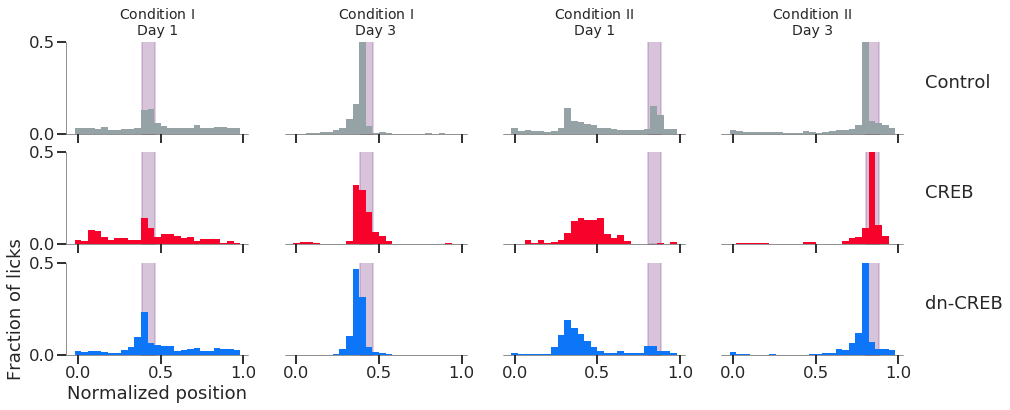

In [51]:
g = mjdplot.plot_example_licks(exptSet,exptGrps,colors)
#g.savefig('figs/behavior-lickogram.svg')

# Lick reward fraction

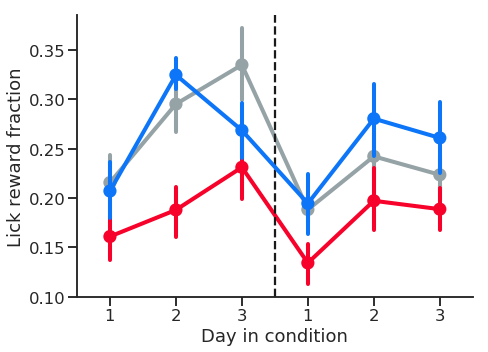

In [13]:
# agg first

height,width = 5.,7

g = sns.catplot(x="day",y="lick_reward_fraction",hue="grp",
            kind="point",data=df_agg, ci=68, heigth=height, aspect=width/height)

g.set(xlabel='Day in condition',
      ylabel='Lick reward fraction',
      xticklabels=[1,2,3]*2)
sns.despine()

g._legend.remove()

g.ax.axvline(2.5, linestyle='--', color='k')

#g.savefig('figs/behavior-ant-licking.svg')

In [12]:
%%R -i df_agg
am2 <-aov(lick_reward_fraction ~ (grp*day) + Error(mouseID/(day)), data = df_agg)

print(summary(am2))


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)  
grp        2 0.1028 0.05141   4.185 0.0445 *
day        2 0.0148 0.00740   0.602 0.5646  
Residuals 11 0.1351 0.01228                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: mouseID:day
          Df  Sum Sq  Mean Sq F value Pr(>F)    
day        5 0.12551 0.025102   7.767  1e-05 ***
grp:day   10 0.02987 0.002987   0.924  0.517    
Residuals 62 0.20039 0.003232                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Anticipatory Licking

In [6]:
# aggegation for stats below
df_agg = df.groupby(['grp','mouseID','day']).mean().reset_index()
df_agg = mjdhelp.sort_df_by_group(df_agg,col='grp')
df_ant = df_agg.loc[:,["grp","mouseID","day","condition","anticipatory_licking"]]


# single condition
df1_ant=df_ant[df_ant.condition == 1]
df2_ant= df_ant[df_ant.condition == 2]
df_agg["day"]=df_agg["day"].astype('str')

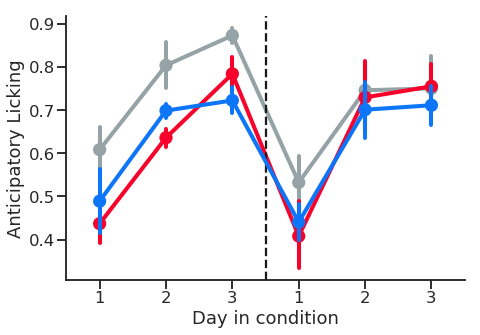

In [44]:
height,width = 5.,7

g = sns.catplot(x="day",y="anticipatory_licking",hue="grp",
            kind="point",data=df_agg, ci=68, heigth=height, aspect=width/height)

g.set(xlabel='Day in condition',
      ylabel='Anticipatory Licking',
      xticklabels=[1,2,3]*2)
sns.despine()

g._legend.remove()

g.ax.axvline(2.5, linestyle='--', color='k')

#g.savefig('figs/behavior-ant-licking.svg')

In [31]:
%%R -i df_agg
am2 <-aov(anticipatory_licking ~ (grp*day) + Error(mouseID/(day)), data = df_agg)

print(summary(am2))


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2 0.1952 0.09762   1.451  0.276
day        2 0.0375 0.01873   0.278  0.762
Residuals 11 0.7402 0.06729               

Error: mouseID:day
          Df Sum Sq Mean Sq F value Pr(>F)    
day        5 1.4802 0.29603  35.238 <2e-16 ***
grp:day   10 0.0905 0.00905   1.077  0.393    
Residuals 62 0.5209 0.00840                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## agg by day 2020

In [2]:
df_agg = df.groupby(['grp','mouseID','day']).mean().reset_index()
df_agg = mjdhelp.sort_df_by_group(df_agg,col='grp')

In [5]:
%%R -i df_agg
am2 <-aov(anticipatory_licking ~ (grp*day) + Error(mouseID/(day)), data = df_agg)

print(summary(am2))


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2 0.1952 0.09762   1.451  0.276
day        1 0.0000 0.00003   0.000  0.984
grp:day    1 0.0374 0.03743   0.556  0.471
Residuals 11 0.7402 0.06729               

Error: mouseID:day
          Df  Sum Sq Mean Sq F value Pr(>F)  
day        1 0.16714 0.16714   7.877 0.0148 *
grp:day    2 0.05908 0.02954   1.392 0.2833  
Residuals 13 0.27585 0.02122                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 61  1.589 0.02606               


## by condition

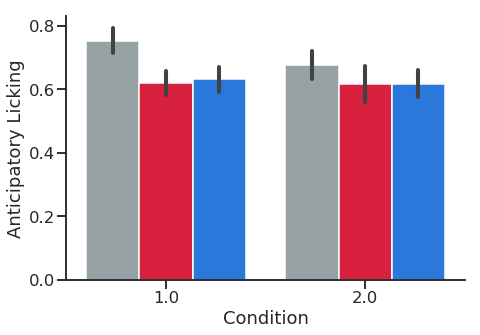

In [104]:
height,width = 5., 7

g = sns.catplot(x="condition",y="anticipatory_licking",hue="grp",
            kind="bar",data=df_agg, ci=68, height=height, aspect=width/height)

g.set(xlabel='Condition', ylabel='Anticipatory Licking')
sns.despine()

g._legend.remove()



### condition 1

In [59]:
%%R -i df1_ant
am2 <-aov(anticipatory_licking ~ (expt_grp*day) + Error(mouseID/(day)), data = df1_ant)

print(summary(am2))


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)  
expt_grp   2 0.1706 0.08531   3.279 0.0703 .
Residuals 13 0.3382 0.02602                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: mouseID:day
             Df Sum Sq Mean Sq F value   Pr(>F)    
day           1 0.6889  0.6889 180.222 5.38e-09 ***
expt_grp:day  2 0.0177  0.0089   2.317    0.138    
Residuals    13 0.0497  0.0038                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df  Sum Sq  Mean Sq F value Pr(>F)
Residuals 15 0.07257 0.004838               


### condition 2

In [60]:
%%R -i df2_ant
am2 <-aov(anticipatory_licking ~ (expt_grp*day) + Error(mouseID/(day)), data = df2_ant)

print(summary(am2))


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
expt_grp   2 0.0351 0.01757   0.285  0.757
day        1 0.1061 0.10612   1.719  0.214
Residuals 12 0.7408 0.06173               

Error: mouseID:day
             Df Sum Sq Mean Sq F value   Pr(>F)    
day           1 0.5532  0.5532  85.239 8.43e-07 ***
expt_grp:day  2 0.0146  0.0073   1.121    0.358    
Residuals    12 0.0779  0.0065                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 15 0.1967 0.01311               


### 
chaning day to string does some pretty funky stuff make more sig

In [33]:
df["day"]=df["day"].astype('str')

In [34]:
%%R -i df
am2 <-aov(anticipatory_licking ~ (grp*day) + Error(mouseID/(day)), data = df)

print(summary(am2))

# wtf string changes things


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)  
grp        2 0.5310 0.26550   7.900 0.0208 *
day        5 1.3091 0.26182   7.791 0.0133 *
grp:day    2 0.6262 0.31309   9.316 0.0145 *
Residuals  6 0.2016 0.03361                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: mouseID:day
          Df Sum Sq Mean Sq F value Pr(>F)    
day        5  4.004  0.8007  36.945 <2e-16 ***
grp:day   10  0.254  0.0254   1.171  0.327    
Residuals 62  1.344  0.0217                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
           Df Sum Sq Mean Sq F value Pr(>F)
Residuals 174  2.731  0.0157               


# within session

In [35]:
df_s1s3= df[df['session'] !=2]
df1=df_s1s3[df_s1s3.condition == 1]
df2=df_s1s3[df_s1s3.condition == 2]

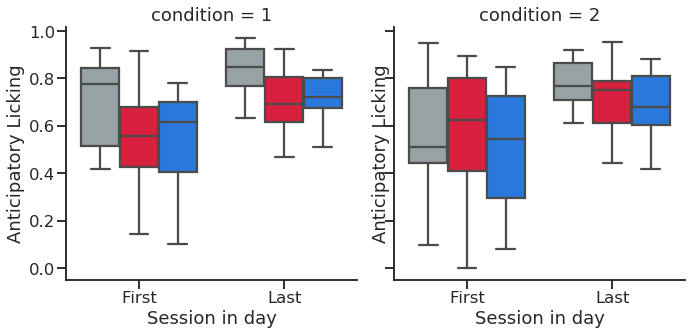

In [43]:
height,width = 5., 5

g = sns.catplot(x="session",y="anticipatory_licking",hue="grp", col = 'condition',
            kind="box",data=df_s1s3, height=height, aspect=width/height,showfliers=False)

g.set(xlabel='Session in day', ylabel='Anticipatory Licking',xticklabels = ["First","Last"])
sns.despine()

g._legend.remove()


g.savefig('figs/behavior-ant-licking-session-in-day.svg')

In [247]:
%R -i df1 am2 <-aov(anticipatory_licking ~ (expt_grp*session) + Error(mouseID/(session)), data = df1); print(summary(am2))


Error: mouseID
                 Df Sum Sq Mean Sq F value  Pr(>F)   
expt_grp          2 0.2618  0.1309   3.639 0.06123 . 
session           1 0.0116  0.0116   0.324 0.58074   
expt_grp:session  1 0.3564  0.3564   9.908 0.00928 **
Residuals        11 0.3957  0.0360                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: mouseID:session
                 Df Sum Sq Mean Sq F value  Pr(>F)    
session           1 0.4539  0.4539 103.151 1.5e-07 ***
expt_grp:session  2 0.0063  0.0031   0.715   0.508    
Residuals        13 0.0572  0.0044                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 61  2.164 0.03547               


In [246]:
%R -i df2 am2 <-aov(anticipatory_licking ~ (expt_grp*session) + Error(mouseID/(session)), data = df2); print(summary(am2))


Error: mouseID
                 Df Sum Sq Mean Sq F value Pr(>F)
expt_grp          2 0.0600 0.03000   0.317  0.735
session           1 0.1267 0.12667   1.340  0.274
expt_grp:session  2 0.2664 0.13321   1.409  0.289
Residuals        10 0.9453 0.09453               

Error: mouseID:session
                 Df Sum Sq Mean Sq F value   Pr(>F)    
session           1 0.6504  0.6504   65.26 2.01e-06 ***
expt_grp:session  2 0.0012  0.0006    0.06    0.942    
Residuals        13 0.1296  0.0100                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 56  2.557 0.04565               


# Other stats (Lap rate, fraction reward, velocity)

/home/matt/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/matt/code/analysis/lab/analysis/behavior_analysis.py:538: UserWarning: Should be either image sync'd or at an explicit sampling interval, defaulting to 'actual' sampling interval
  "interval, defaulting to 'actual' sampling interval")


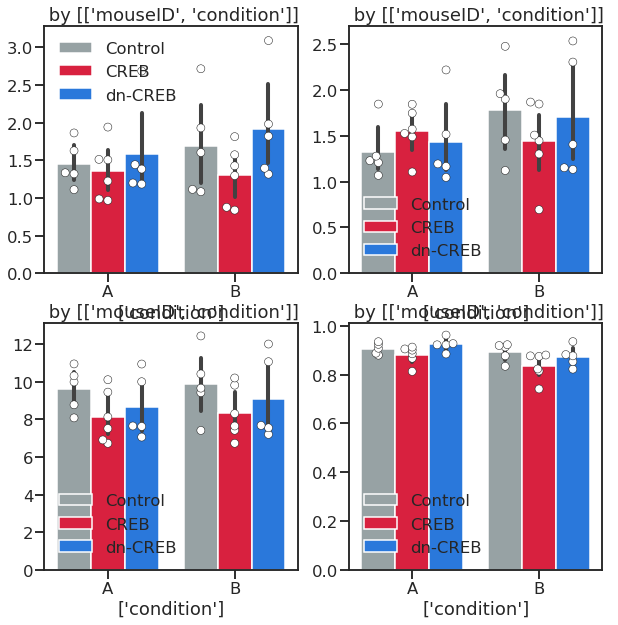

In [4]:
# get data
from lab.classes.classes import ExperimentGroup as eg
from lab.analysis import reward_analysis as ra
data={}

fig = plt.figure(figsize=(10, 10))

lap_rate_ax= fig.add_subplot(221)
lick_rate_ax=fig.add_subplot(222)
velocity_ax=fig.add_subplot(223)
frac_reward_laps_ax=fig.add_subplot(224)

marker_size=8
legend_fontsize=13

groupby=[['mouseID','condition']]
plotby=None
plotby=['condition']

behavior_fn = eg.number_of_laps 
behavior_kwargs={'rate':True}
activity_label = ''
data['lap_rate']=plot_metric(
        ax=lap_rate_ax, exptGrps=exptGrps,
        metric_fn=behavior_fn, plot_method='swarm',
        groupby=groupby, plotby=plotby, activity_kwargs=behavior_kwargs,
        activity_label=activity_label,colors=colors,
        plot_bar=True, edgecolor='k', linewidth=0.5, size=marker_size,
        rotate_labels=False)

behavior_fn = eg.number_of_licks
behavior_kwargs={'rate':True}
activity_label = ''
data['lick_rate']=plot_metric(
        ax=lick_rate_ax, exptGrps=exptGrps,
        metric_fn=behavior_fn, plot_method='swarm',
        groupby=groupby, plotby=plotby, activity_kwargs=behavior_kwargs,
        activity_label=activity_label,colors=colors,
        plot_bar=True, edgecolor='k', linewidth=0.5, size=marker_size,
        rotate_labels=False)

behavior_fn = eg.velocity_dataframe
behavior_kwargs={}
activity_label = ''
data['velocity']=plot_metric(
        ax=velocity_ax, exptGrps=exptGrps,
        metric_fn=behavior_fn, plot_method='swarm',
        groupby=groupby, plotby=plotby, activity_kwargs=behavior_kwargs,
        activity_label=activity_label,colors=colors,
        plot_bar=True, edgecolor='k', linewidth=0.5, size=marker_size,
        rotate_labels=False)


behavior_fn =ra.fraction_of_laps_rewarded
behavior_kwargs={}
activity_label = ''
data['frac_reward_laps']=plot_metric(
        ax=frac_reward_laps_ax, exptGrps=exptGrps,
        metric_fn=behavior_fn, plot_method='swarm',
        groupby=groupby, plotby=plotby, activity_kwargs=behavior_kwargs,
        activity_label=activity_label,colors=colors,
        plot_bar=True, edgecolor='k', linewidth=0.5, size=marker_size,
        rotate_labels=False)


Velocity (cm/s)


              Df Sum Sq Mean Sq F value Pr(>F)
grp            2  12.28   6.138   2.290  0.121
condition      1   0.70   0.705   0.263  0.612
grp:condition  2   0.08   0.041   0.015  0.985
Residuals     26  69.68   2.680               


Fraction of rewarded laps


              Df  Sum Sq  Mean Sq F value Pr(>F)  
grp            2 0.01294 0.006469   4.282 0.0247 *
condition      1 0.01082 0.010823   7.165 0.0127 *
grp:condition  2 0.00197 0.000983   0.650 0.5301  
Residuals     26 0.03928 0.001511                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Lap rate (per min)


              Df Sum Sq Mean Sq F value Pr(>F)
grp            2  0.973  0.4866   1.758  0.192
condition      1  0.209  0.2091   0.755  0.393
grp:condition  2  0.232  0.1160   0.419  0.662
Residuals     26  7.197  0.2768               


Lick rate (per min)


              Df Sum Sq Mean Sq F value Pr(>F)
grp            2  0.032 0.01618   0.079  0.925
condition      1  0.291 0.29062   1.411  0.246
grp:condition  2  0.453 0.22665   1.100  0.348
Residuals     26  5.355 0.20595               


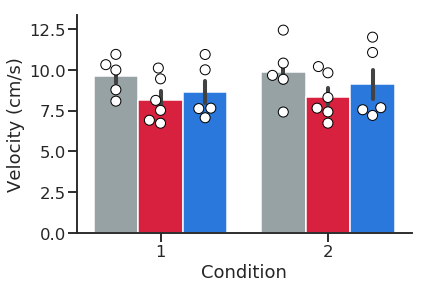

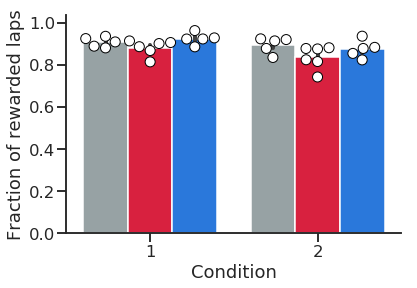

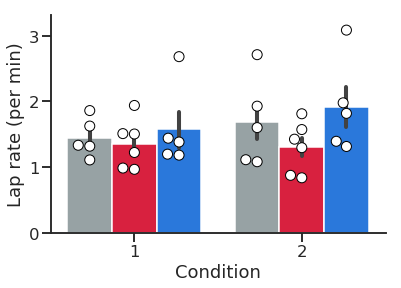

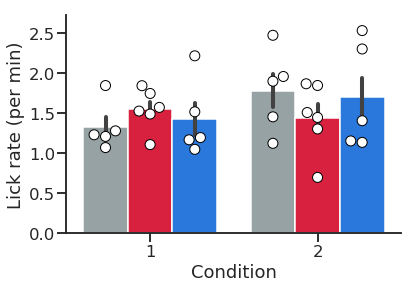

In [8]:
# ANOVA
labels = ['Velocity (cm/s)',
          'Fraction of rewarded laps',
          'Lap rate (per min)',
          'Lick rate (per min)']

for key,label in zip(data,labels):
    df = stats.prep_data(data[key])

    fig,ax=plt.subplots(1)
    p = ['white']*3
    
    sns.barplot(ax=ax, x="condition", y="value", hue='grp', data=df, palette=colors,ci=68)
    sns.swarmplot(ax=ax, x="condition", hue='grp', y="value",data=df,palette=p,
                       size = 10,edgecolor='black',dodge=True, linewidth=1)


    sns.despine()

    ax.legend().remove()
    ax.set(xlabel='Condition', ylabel=label,xticklabels=["1","2"])
    #stats
    print(label)
    %R -i df am2 <-aov(value ~ (grp*condition), data = df); print(summary(am2))
    
    fig.savefig('figs/supp/supp-behavior-{}.svg'.format(label[:3]))

Velocity (cm/s)



Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2  12.28   6.138   1.203  0.332
Residuals 13  66.33   5.102               

Error: mouseID:condition
              Df Sum Sq Mean Sq F value Pr(>F)
condition      1  0.705  0.7049   2.731  0.122
grp:condition  2  0.082  0.0409   0.158  0.855
Residuals     13  3.356  0.2581               


Fraction of rewarded laps



Error: mouseID
          Df  Sum Sq  Mean Sq F value Pr(>F)  
grp        2 0.01294 0.006469   4.544 0.0319 *
Residuals 13 0.01851 0.001424                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: mouseID:condition
              Df   Sum Sq  Mean Sq F value Pr(>F)  
condition      1 0.010823 0.010823   6.774 0.0219 *
grp:condition  2 0.001965 0.000983   0.615 0.5556  
Residuals     13 0.020770 0.001598                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Lap rate (per min)



Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2  0.973  0.4866   0.985    0.4
Residuals 13  6.422  0.4940               

Error: mouseID:condition
              Df Sum Sq Mean Sq F value Pr(>F)  
condition      1 0.2091 0.20911   3.506 0.0838 .
grp:condition  2 0.2321 0.11605   1.946 0.1823  
Residuals     13 0.7754 0.05964                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Lick rate (per min)



Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2  0.032  0.0162    0.05  0.952
Residuals 13  4.216  0.3243               

Error: mouseID:condition
              Df Sum Sq Mean Sq F value Pr(>F)  
condition      1 0.2906 0.29062   3.318 0.0916 .
grp:condition  2 0.4533 0.22665   2.588 0.1132  
Residuals     13 1.1386 0.08758                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


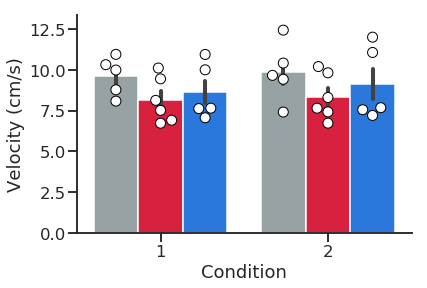

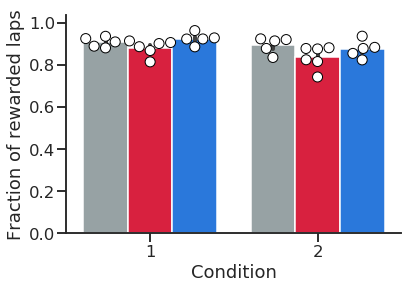

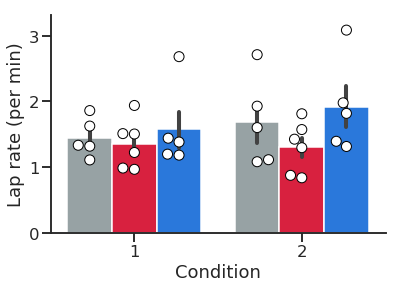

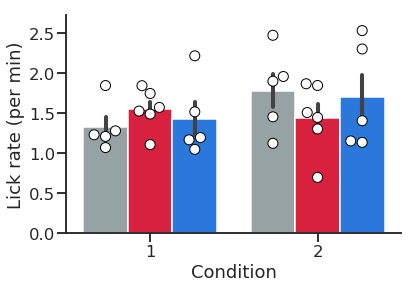

In [21]:
# RM ANOVA
labels = ['Velocity (cm/s)',
          'Fraction of rewarded laps',
          'Lap rate (per min)',
          'Lick rate (per min)']

for key,label in zip(data,labels):
    df = stats.prep_data(data[key])

    fig,ax=plt.subplots(1)
    p = ['white']*3
    
    sns.barplot(ax=ax, x="condition", y="value", hue='grp', data=df, palette=colors,ci=68)
    sns.swarmplot(ax=ax, x="condition", hue='grp', y="value",data=df,palette=p,
                       size = 10,edgecolor='black',dodge=True, linewidth=1)


    sns.despine()

    ax.legend().remove()
    ax.set(xlabel='Condition', ylabel=label,xticklabels=["1","2"])
    #stats
    print(label)
    %R -i df am2 <-aov(value ~ (grp*condition) + Error(mouseID/(condition)), data = df); print(summary(am2))
    
    fig.savefig('figs/supp/supp-behavior-{}.svg'.format(label[:3]))

## follow up stats --> frac_reward was sig, collapse across 

            Df  Sum Sq  Mean Sq F value Pr(>F)  
grp          2 0.01294 0.006469   3.603   0.04 *
Residuals   29 0.05207 0.001795                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


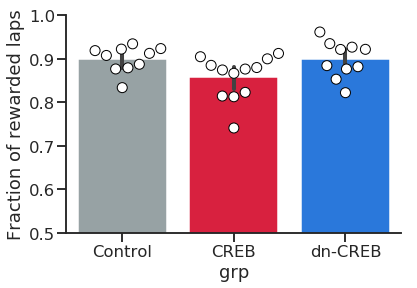

In [235]:
df=stats.prep_data(data['frac_reward_laps'])

plt.figure()
p=['white','white','white']
ax = sns.barplot(x="grp",y="value",data=df,palette=colors,ci=68)

ax = sns.swarmplot(x="grp",y="value",data=df,palette=p,
                   size = 10, edgecolor='black', dodge=True, linewidth=1)


sns.despine()

ax.legend().remove()
ax.set(ylim=[.5, 1],ylabel='Fraction of rewarded laps')


%R -i df am2 <-aov(value ~ grp, data = df); print(summary(am2))

In [236]:
stats.full_anova(df,ind_vars=['grp'],dep_var='value')

# Formula: value~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.144    
Dependent Variable: value            AIC:                -108.6591
Date:               2019-07-16 21:45 BIC:                -104.2619
No. Observations:   32               Log-Likelihood:     57.330   
Df Model:           2                F-statistic:        3.603    
Df Residuals:       29               Prob (F-statistic): 0.0400   
R-squared:          0.199            Scale:              0.0017954
------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
------------------------------------------------------------------
Intercept             0.8576   0.0122 70.1145 0.0000 0.8326 0.8826
C(grp)[T.Control]     0.0421   0.0181  2.3216 0.0275 0.0050 0.0792
C(grp)[T.dn-CREB]     0.0409   0.0181  2.2558 0.0318 0.0038 0.0780
-----------

# Individual licking

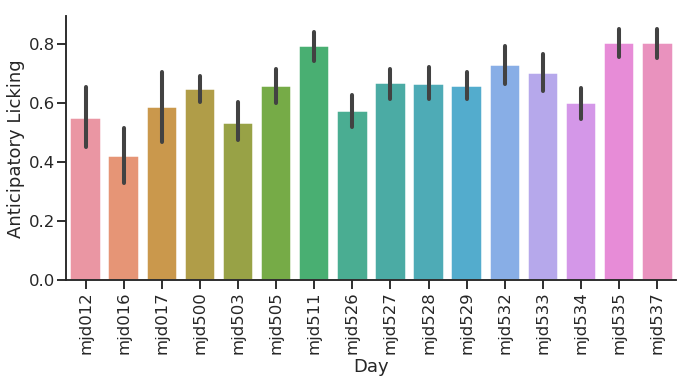

In [204]:
df_s = df_agg.sort_values(by=['mouseID'])
height,width = 5., 10

g = sns.catplot(x="mouseID",y="anticipatory_licking",
            kind="bar",data=df_s, ci=68,height=height, aspect=width/height)

g.set(xlabel='Day', ylabel='Anticipatory Licking')
sns.despine()
g.set_xticklabels(rotation=90)


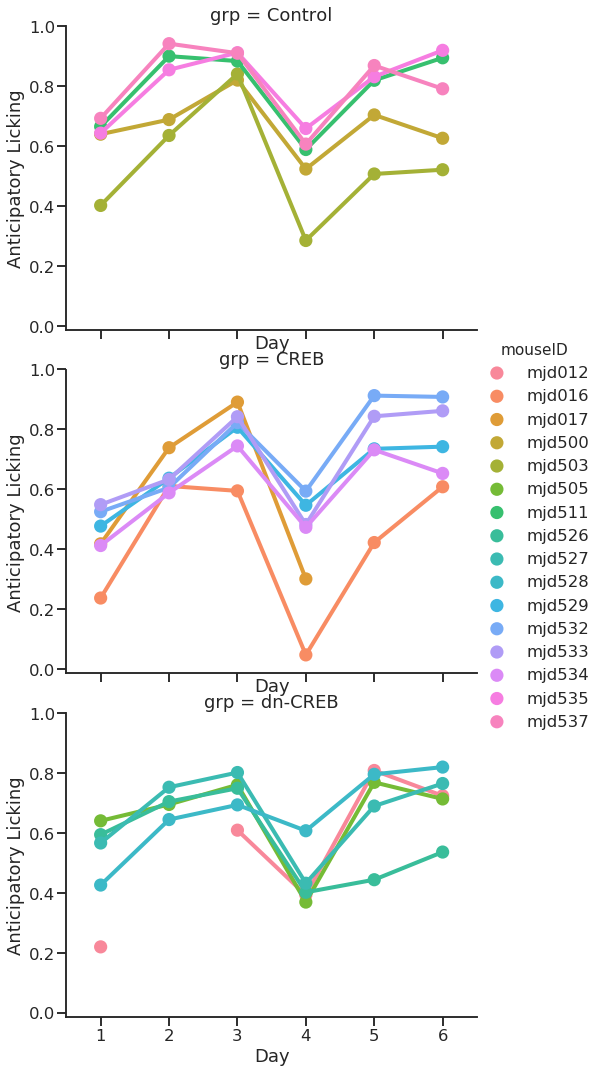

In [16]:
df_s = df_agg.sort_values(by=['mouseID'])
height,width = 5., 7

g = sns.catplot(x="day",y="anticipatory_licking", row = 'grp', hue = 'mouseID',
            kind="point",data=df_s, ci=68,height=height, aspect=width/height)

g.set(xlabel='Day', ylabel='Anticipatory Licking')
sns.despine()

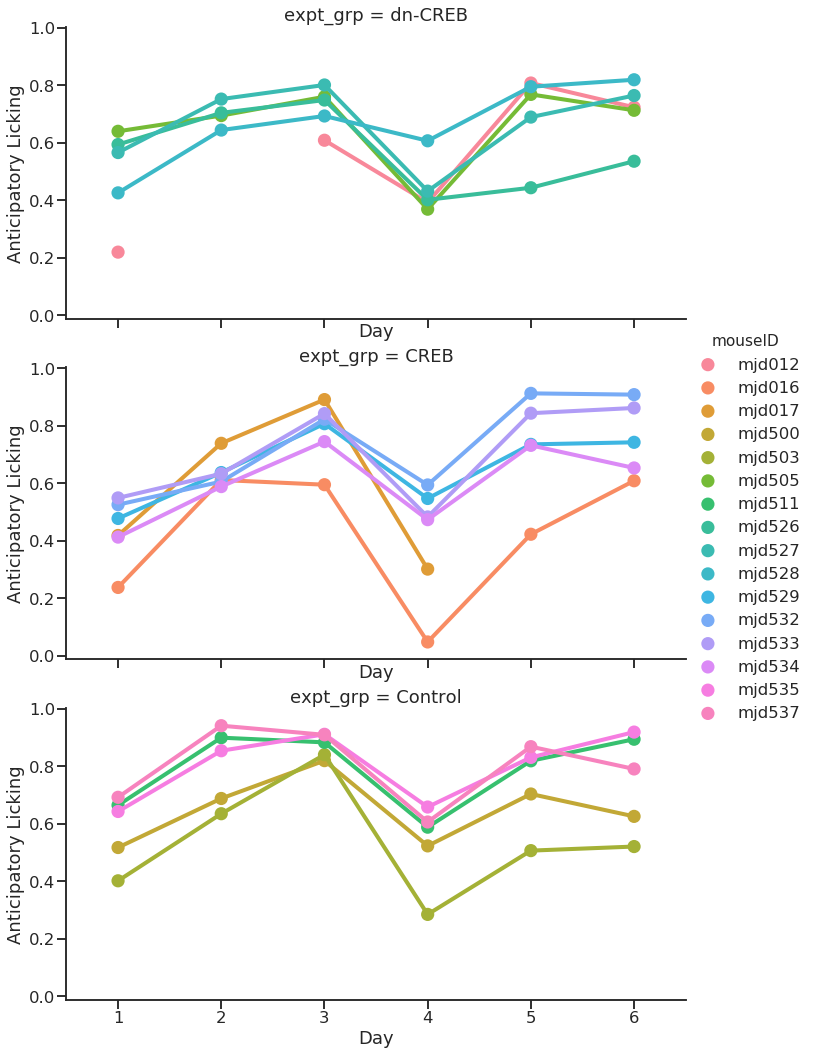

In [69]:
df_s = df_agg.sort_values(by=['mouseID'])
height,width = 5., 10

g = sns.catplot(x="day",y="anticipatory_licking", row = 'expt_grp', hue = 'mouseID',
            kind="point",data=df_s, ci=68,height=height, aspect=width/height)

g.set(xlabel='Day', ylabel='Anticipatory Licking')
sns.despine()


# Vector graphics inline

In [236]:
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

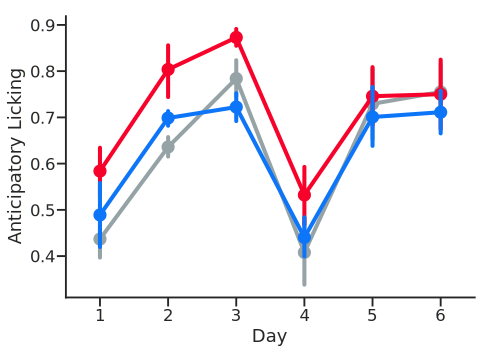

In [237]:
height,width = 5., 7

g = sns.catplot(x="day",y="anticipatory_licking",hue="expt_grp",
            kind="point",data=df_agg, ci=68, height=height, aspect=width/height)

g.set(xlabel='Day', ylabel='Anticipatory Licking')
sns.despine()
g._legend.remove()

In [239]:
g.savefig('lick.svg')